In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Country-data (1).csv")
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
data.shape

(167, 10)

In [4]:
data.columns 

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
data.count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [7]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#there is no nullvalues in the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)

In [11]:
data.head()


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     55.0    42.0    248.0    1610   
1              Albania        16.6   1145.0   268.0   1988.0    9930   
2              Algeria        27.3   1713.0   186.0   1400.0   12900   
3               Angola       119.0   2199.0   101.0   1514.0    5900   
4  Antigua and Barbuda        10.3   5551.0   736.0   7186.0   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

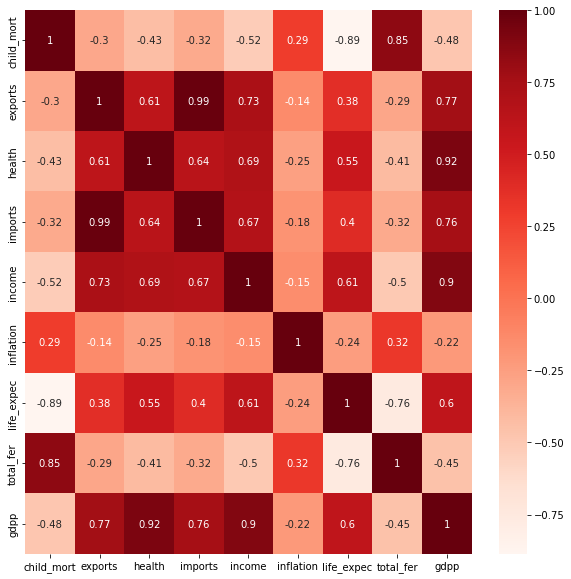

In [17]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(),annot=True,cmap="Reds")
plt.show()


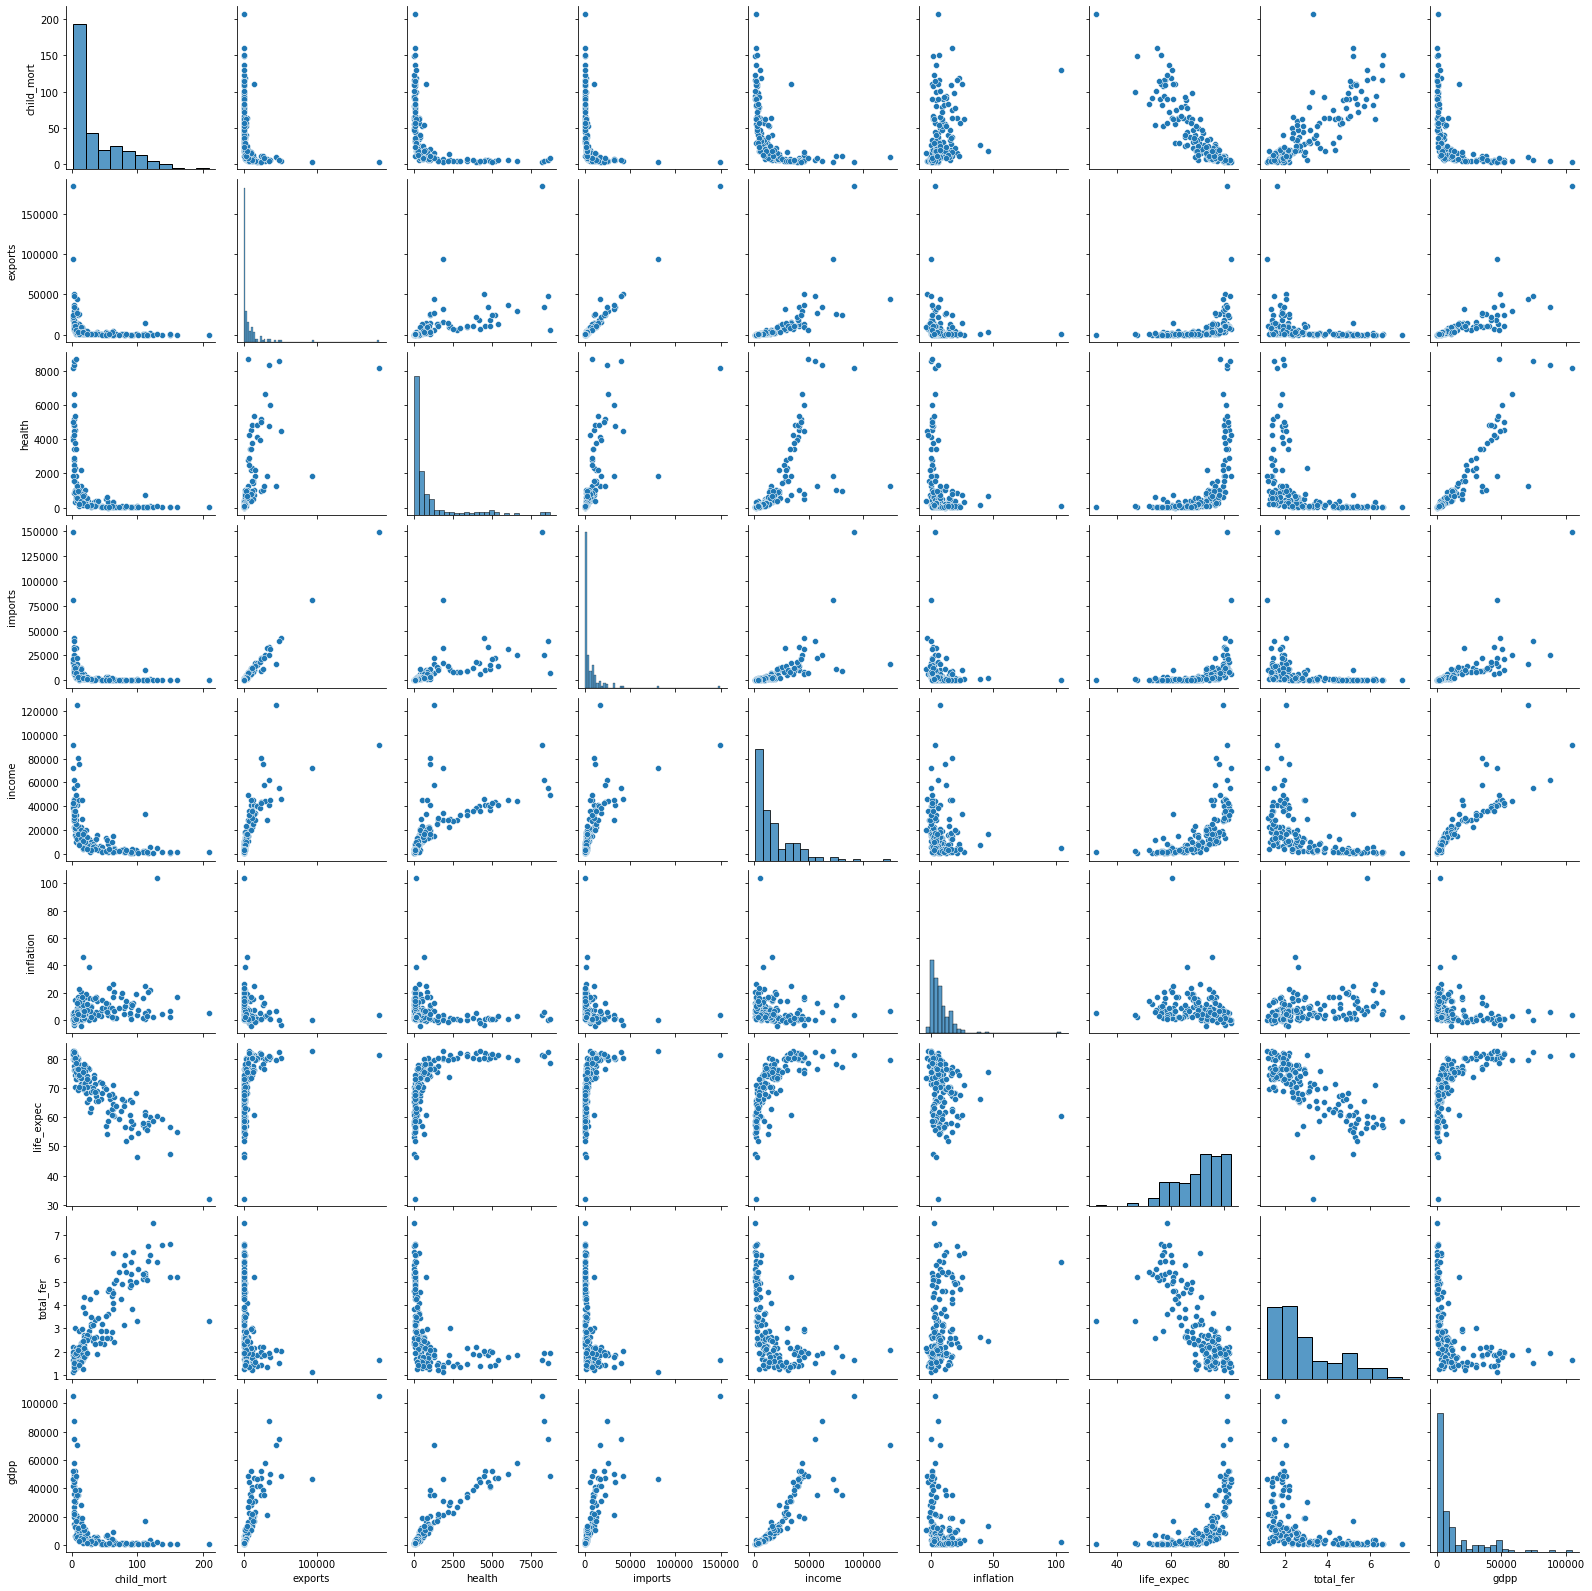

In [18]:
sns.pairplot(data)


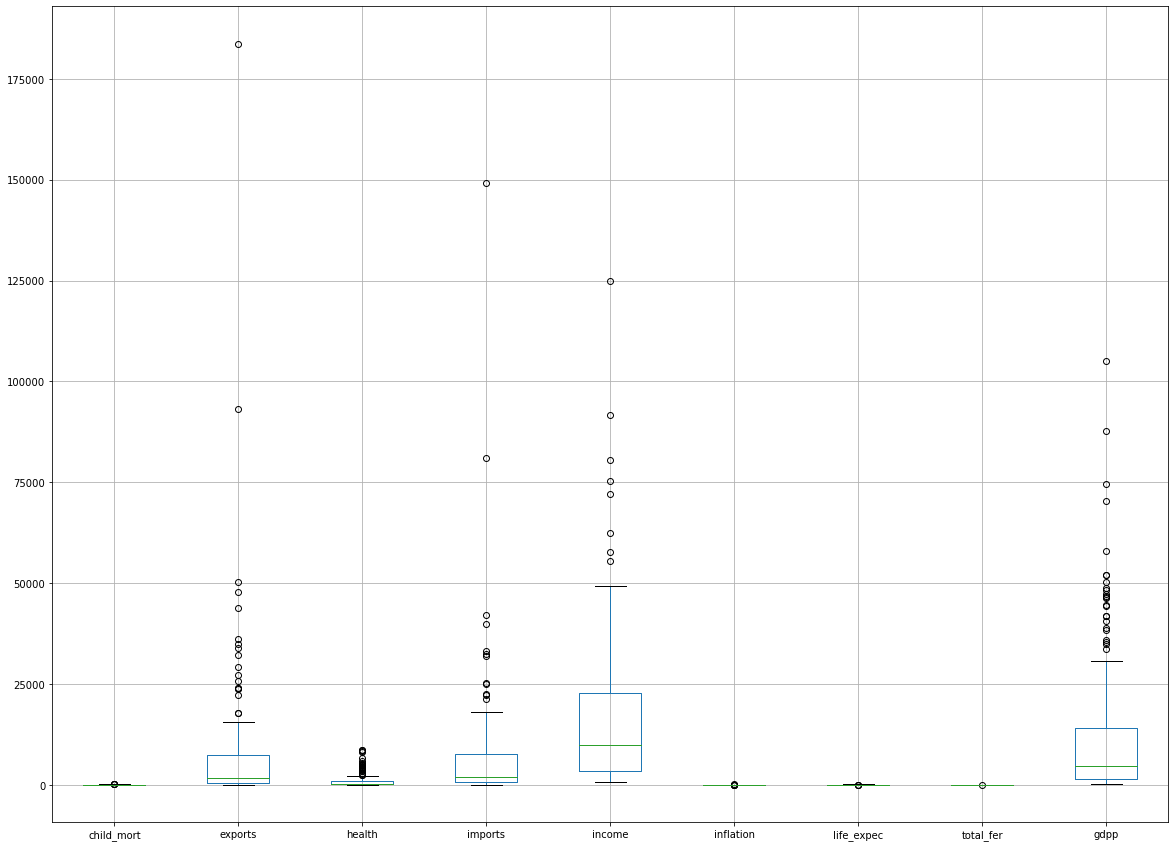

In [19]:
#Checking for outliers
outliers=data.select_dtypes(include=['int64','float64','int32'])
outliers.boxplot(figsize=(20,15))
plt.show()

In [39]:
#IQR calculation
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

child_mort     4
country        0
exports       18
gdpp          25
health        24
imports       12
income         8
inflation      5
life_expec     3
total_fer      1
dtype: int64


In [21]:
#Scaling
from sklearn.preprocessing import StandardScaler
data1=data.drop('country',axis=1)
scalar=StandardScaler()
data1=scalar.fit_transform(data1)

1503.0000000000002
942.2040077262791
651.3798879024828
479.76042843920095
400.6601759237623
348.24914982145026
305.78853652269066
268.9549970800511
239.9729050168194
221.28426542745532


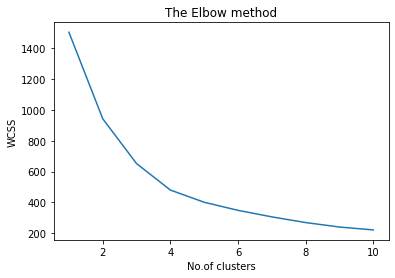

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
     kmeans=KMeans(n_clusters=k,random_state=42)
     kmeans.fit(data1)
     wcss.append(kmeans.inertia_)
     print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(data1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [25]:
#validating the efficiency
from sklearn.metrics import silhouette_score

score = silhouette_score(data1,kmeans.labels_, metric='euclidean',random_state=42)
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.422


In [27]:
data3 = pd.concat([data, pd.Series(kmeans.labels_)], axis = 1)
data3.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']

In [28]:
data3.head()


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     55.0    42.0    248.0    1610   
1              Albania        16.6   1145.0   268.0   1988.0    9930   
2              Algeria        27.3   1713.0   186.0   1400.0   12900   
3               Angola       119.0   2199.0   101.0   1514.0    5900   
4  Antigua and Barbuda        10.3   5551.0   736.0   7186.0   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           1  
1       4.49        76.3       1.65   4090           2  
2      16.10        76.5       2.89   4460           2  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

In [29]:
data3['cluster_id'].value_counts()

2    91
1    48
0    28
Name: cluster_id, dtype: int64

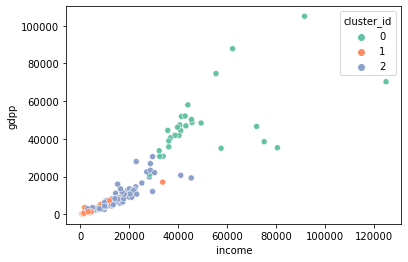

In [30]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = data3, palette='Set2')
plt.show()

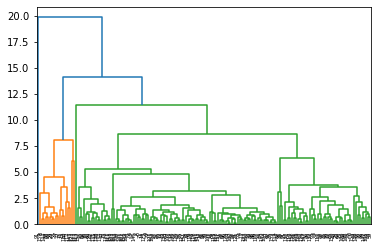

In [31]:
#Heirarichal Clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
mergings_complete = linkage(data1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [32]:
df_hc = data.copy()

df_hc.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     55.0    42.0    248.0    1610   
1              Albania        16.6   1145.0   268.0   1988.0    9930   
2              Algeria        27.3   1713.0   186.0   1400.0   12900   
3               Angola       119.0   2199.0   101.0   1514.0    5900   
4  Antigua and Barbuda        10.3   5551.0   736.0   7186.0   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [33]:
clusterCut = pd.Series(cut_tree(mergings_complete, n_clusters = 4).reshape(-1,))
df_hc_cut = pd.concat([df_hc, clusterCut], axis=1)
df_hc_cut.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hc_cut.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     55.0    42.0    248.0    1610   
1              Albania        16.6   1145.0   268.0   1988.0    9930   
2              Algeria        27.3   1713.0   186.0   1400.0   12900   
3               Angola       119.0   2199.0   101.0   1514.0    5900   
4  Antigua and Barbuda        10.3   5551.0   736.0   7186.0   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels  
0       9.44        56.2       5.82    553               0  
1       4.49        76.3       1.65   4090               0  
2      16.10        76.5       2.89   4460               0  
3      22.40        60.1       6.16   3530               0  
4       1.44        76.8       2.13  12200               0

In [34]:
df_hc_cut['cluster_labels'].value_counts()


0    147
1     18
2      1
3      1
Name: cluster_labels, dtype: int64

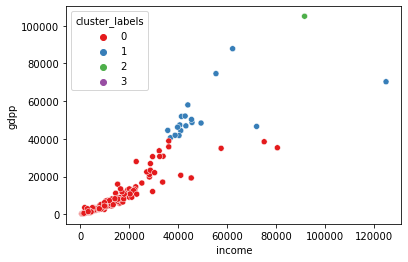

In [35]:
#income vs gdpp
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hc_cut, palette='Set1')
plt.show()

In [36]:
df_hc_cut[df_hc_cut['cluster_labels']==0]['country']


0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 147, dtype: object

In [41]:
country_list = df_hc_cut[df_hc_cut['cluster_labels']==0].sort_values(by=["gdpp","income"],ascending=[True,True]) 
country_list = country_list.reset_index().drop('index',1)
country_list.head(10)

country  child_mort  exports  health  imports  income  \
0                   Burundi        93.6     21.0    27.0     91.0     764   
1                   Liberia        89.3     62.0    39.0    303.0     700   
2          Congo, Dem. Rep.       116.0    137.0    26.0    166.0     609   
3                     Niger       123.0     77.0    18.0    171.0     814   
4              Sierra Leone       160.0     67.0    52.0    138.0    1220   
5                Madagascar        62.2    103.0    16.0    178.0    1390   
6                Mozambique       101.0    132.0    22.0    194.0     918   
7  Central African Republic       149.0     53.0    18.0    118.0     888   
8                    Malawi        90.5    105.0    30.0    160.0    1030   
9                   Eritrea        55.2     23.0    13.0    112.0    1420   

   inflation  life_expec  total_fer  gdpp  cluster_labels  
0      12.30        57.7       6.26   231               0  
1       5.47        60.8       5.02   327               0  
2      20.80        57.5       6.54   334               0  
3       2.55        58.8       7.49   348               0  
4      17.20        55.0       5.20   399               0  
5       8.79        60.8       4.60   413               0  
6       7.64        54.5       5.56   419               0  
7       2.01        47.5       5.21   446               0  
8      12.10        53.1       5.31   459               0  
9      11.60        61.7       4.61   482               0